In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# Reflect the tables



In [7]:
# View all of the classes that automap found
# View all of the classes that automap found
print(Base.classes.keys())


['measurement', 'station']


In [8]:
# Save references to each table
# Save references to the measurement and station tables
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Confirm session is linked to the database
print("Session created and linked to the database.")

Session created and linked to the database.


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the dataset
most_recent_date = session.query(func.max(Measurement.date)).scalar()

# Print the most recent date
print(f"The most recent date in the dataset is: {most_recent_date}")


The most recent date in the dataset is: 2017-08-23


Text(0, 0.5, 'Inches')


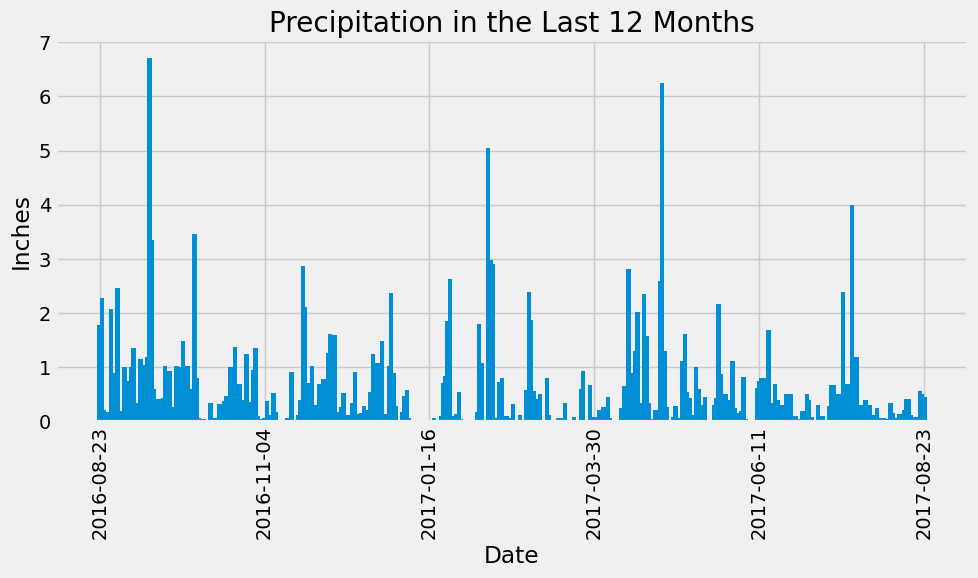

In [12]:
# Calculate the date one year from the most recent date in the dataset
one_year_ago = pd.to_datetime(most_recent_date) - pd.DateOffset(years=1)
one_year_ago = one_year_ago.strftime("%Y-%m-%d")

# Perform a query to retrieve the date and precipitation scores for the last 12 months
precipitation_data = (
    session.query(Measurement.date, Measurement.prcp)
    .filter(Measurement.date >= one_year_ago)
    .all()
)

# Save the query results as a Pandas DataFrame and explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=["date", "precipitation"])

# Drop rows with missing precipitation values
precipitation_df.dropna(inplace=True)

# Sort the DataFrame by date
precipitation_df.sort_values("date", inplace=True)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(precipitation_df["date"], precipitation_df["precipitation"], width=2, align='center')

# Add labels and title
plt.title("Precipitation in the Last 12 Months")
plt.xlabel("Date")
plt.ylabel("Inches")

# Format the x-axis to show fewer date labels
x_ticks = pd.date_range(start=one_year_ago, end=most_recent_date, periods=6)
plt.xticks(x_ticks.strftime('%Y-%m-%d'), rotation=90)

# Ensure layout is clean
plt.tight_layout()

# Display text above graph
print("Text(0, 0.5, 'Inches')")

# Show the plot
plt.show()



In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = precipitation_df["precipitation"].describe()

# Print the summary statistics
print("Summary Statistics for Precipitation Data:")
print(summary_statistics)


Summary Statistics for Precipitation Data:
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


# Exploratory Station Analysis

In [14]:
# Query to calculate the total number of stations
total_stations = session.query(func.count(Station.station)).scalar()

# Print the total number of stations
print(f"Total Number of Stations: {total_stations}")


Total Number of Stations: 9


In [15]:
# Query to find the most active stations and their observation counts
most_active_stations = (
    session.query(Measurement.station, func.count(Measurement.station))
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.station).desc())
    .all()
)

# Print the stations and their counts in descending order
print("Most Active Stations:")
print(most_active_stations)


Most Active Stations:
[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [16]:
# Identify the most active station ID from the previous query
most_active_station_id = most_active_stations[0][0]  # First station in the list

# Query to calculate the lowest, highest, and average temperature for the most active station
temperature_stats = (
    session.query(
        func.min(Measurement.tobs),
        func.avg(Measurement.tobs),
        func.max(Measurement.tobs)
    )
    .filter(Measurement.station == most_active_station_id)
    .all()
)

# Print the temperature statistics in the desired order
print(f"Temperature statistics for the most active station ({most_active_station_id}):")
print(f"Lowest Temperature: {temperature_stats[0][0]}")
print(f"Highest Temperature: {temperature_stats[0][2]}")
print(f"Average Temperature: {temperature_stats[0][1]:.2f}")


Temperature statistics for the most active station (USC00519281):
Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66


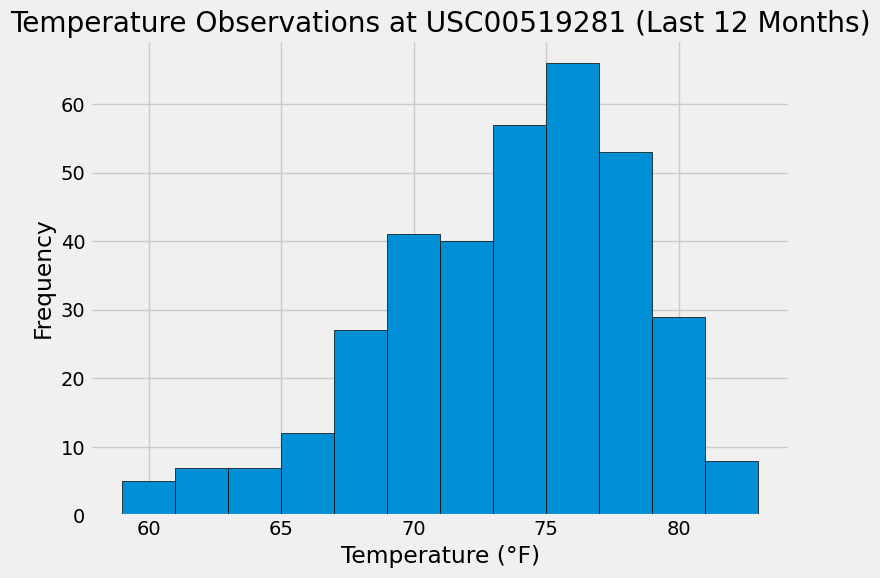

In [17]:
# Calculate the date one year from the most recent date in the dataset
one_year_ago = pd.to_datetime(most_recent_date) - pd.DateOffset(years=1)
one_year_ago = one_year_ago.strftime("%Y-%m-%d")

# Query the last 12 months of temperature observation data for the most active station
tobs_data = (
    session.query(Measurement.tobs)
    .filter(Measurement.station == most_active_station_id)
    .filter(Measurement.date >= one_year_ago)
    .all()
)

# Convert the query results to a Pandas DataFrame
tobs_df = pd.DataFrame(tobs_data, columns=["tobs"])

# Plot the data as a histogram
plt.figure(figsize=(8, 6))
plt.hist(tobs_df["tobs"], bins=12, edgecolor="black")
plt.title(f"Temperature Observations at {most_active_station_id} (Last 12 Months)")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# Close Session

In [18]:
# Close Session
session.close()